# Part B

In [1]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

x1 = list([9,3,13,10,4,-5,3,11])
x2 = list([12,6,14,12,4,-1,8,1])
x3 = list([7,6,1,7,3,4,6,6])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.scatter(x1, x2, x3)
pyplot.show()

<Figure size 640x480 with 1 Axes>

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
y = [101,66,85,103,47,19,72,67]
data = pd.DataFrame()
data['x1'] = x1
data['x2'] = x2
data['x3'] = x3
data['y'] = y
X = data.values[:,0:3]       
Y = data.values[:,3]       

pca = PCA(n_components=2)   
pca.fit(X)                  
newX=pca.fit_transform(X)   
# PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_)  
print(newX)  

[0.77450899 0.1593753 ]
[[-5.57254439 -1.71660975]
 [ 2.90043937 -1.25994106]
 [-9.88514771 -0.53278013]
 [-6.31668209 -1.04858349]
 [ 3.49235417  0.8963606 ]
 [13.52972478 -1.39518719]
 [ 1.56438685 -2.74821647]
 [ 0.28746902  7.8049575 ]]


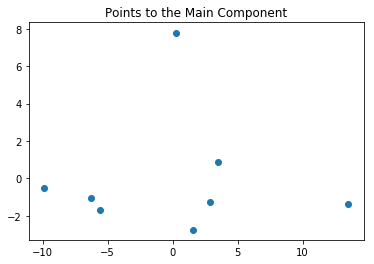

In [4]:
import matplotlib.pyplot as plt
newX = pd.DataFrame(newX)
plt.scatter(newX[0],newX[1])
plt.title('Points to the Main Component')
plt.show()

In [5]:
import statsmodels.formula.api as smf
X = data[['x1', 'x2','x3']]
y = data['y']
est = smf.ols(formula='y ~ x1 + x2 +x3', data=data).fit()
y_pred = est.predict(X)

print(data)
print(est.summary()) 
print(est.params) 

   x1  x2  x3    y
0   9  12   7  101
1   3   6   6   66
2  13  14   1   85
3  10  12   7  103
4   4   4   3   47
5  -5  -1   4   19
6   3   8   6   72
7  11   1   6   67
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.388e+29
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.11e-60
Time:                        20:48:10   Log-Likelihood:                 236.51
No. Observations:                   8   AIC:                            -465.0
Df Residuals:                       4   BIC:                            -464.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err       

C:\Users\78472\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [6]:
import statsmodels.formula.api as smf
newX['y'] = y
newX['c1'] = newX[0]
newX['c2'] = newX[1]
X = newX[['c1', 'c2']]
y = data['y']
est = smf.ols(formula='y ~ c1 + c2', data=newX).fit()
y_pred = est.predict(X)

print(newX)
print(est.summary()) 
print(est.params) 

           0         1    y         c1        c2
0  -5.572544 -1.716610  101  -5.572544 -1.716610
1   2.900439 -1.259941   66   2.900439 -1.259941
2  -9.885148 -0.532780   85  -9.885148 -0.532780
3  -6.316682 -1.048583  103  -6.316682 -1.048583
4   3.492354  0.896361   47   3.492354  0.896361
5  13.529725 -1.395187   19  13.529725 -1.395187
6   1.564387 -2.748216   72   1.564387 -2.748216
7   0.287469  7.804957   67   0.287469  7.804957
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     14.48
Date:                Mon, 17 Feb 2020   Prob (F-statistic):            0.00832
Time:                        20:48:20   Log-Likelihood:                -29.772
No. Observations:                   8   AIC:                             65.54
Df Res

C:\Users\78472\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


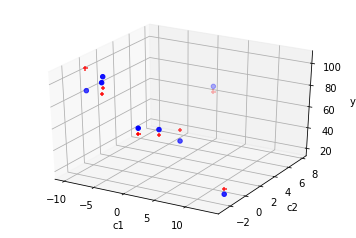

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(newX['c1'], newX['c2'], y, c='b', marker='o')
ax.scatter(newX['c1'], newX['c2'], y_pred, c='r', marker='+')
ax.set_xlabel('c1')
ax.set_ylabel('c2')
ax.set_zlabel('y')
plt.show()

# Part C Naive Bayes

In [3]:
from pandas import read_csv
from scipy import linalg
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import scale
import numpy as np
import matplotlib as mpl
import scipy

In [14]:
column_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N','O','P','Q','label']
train = read_csv('C:/train.csv', names=column_names)
data = train.values[:,0:17]
target = train.values[:,17]
print(train[0:5])

          A         B         C       D         E      F  G         H  \
0  1.054530  0.095184  0.308519  0.1906  9.486833  1.985  0  0.632456   
1  1.055480  0.104690  0.323558  0.2096  7.416198  1.625  0  0.623699   
2  1.056505  0.114061  0.337730  0.2301  5.916080  1.260  0  0.664831   
3  1.056800  0.116619  0.341495  0.2360  8.660254  2.500  0  0.640312   
4  1.056905  0.117516  0.342806  0.2381  8.944272  0.730  0  0.649615   

          I     J         K   L      M    N     O          P         Q  label  
0  2.662330  10.3  2.703202   2  141.5  571  6.65  19.867562  1.801785      1  
1  2.540276  21.4  2.703202   2  149.0  601  6.65  19.867562  1.868798      0  
2  2.690911  38.8  2.652904   2  141.0  569  6.75  19.868065  1.343075      1  
3  2.426520  37.1  2.705494  10  233.5  939  9.55  19.922349  2.847077      0  
4  2.806243  21.5  2.376636  17  126.5  511  6.20  19.855226  0.723369      1  


In [15]:
# Divide the target into two classes
targetClassB = target > np.mean(target)
targetClassI = targetClassB.astype(int)

data_s = scale(data,with_mean=True,with_std=True, axis=0)
data_c = np.corrcoef(data_s.T)
eig_val,r_eig_vec = scipy.linalg.eig(data_c)

In [16]:
w = r_eig_vec[:,0:2]
data_rd = data_s.dot(w)        # PCA Transformed data

In [17]:
# Preforming data modeling and classification
model = GaussianNB()
model.fit(data_rd, targetClassI)
predicted = model.predict(data_rd)

In [18]:
# Diaplay the classification report
print("Classification Report on dimensional reduction data:")
print(metrics.classification_report(targetClassI, predicted))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(targetClassI, predicted))

model_all = GaussianNB()
model_all.fit(data, targetClassI)
predicted_all = model_all.predict(data)

Classification Report on dimensional reduction data:
             precision    recall  f1-score   support

          0       0.80      0.71      0.76       247
          1       0.62      0.73      0.67       159

avg / total       0.73      0.72      0.72       406


Confusion Matrix:
[[176  71]
 [ 43 116]]


In [19]:
# Diaplay the classification report
print("Classification Report on source data:")
print(metrics.classification_report(targetClassI, predicted_all))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(targetClassI, predicted_all))

Classification Report on source data:
             precision    recall  f1-score   support

          0       0.85      0.49      0.63       247
          1       0.52      0.87      0.65       159

avg / total       0.72      0.64      0.64       406


Confusion Matrix:
[[122 125]
 [ 21 138]]
